# Case 1 : Decision Tree with Regression Problem

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [3]:
dataset = pd.read_csv('Dataset/50_Startups.csv')

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#check missing value
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
dataset['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [10]:
dataset = pd.get_dummies(dataset , columns = ['State'], drop_first = True)

In [11]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [26]:
#split the data into independent variable and dependent variable
x= dataset.drop(columns = ['Profit'])
y = dataset[['Profit']]

In [28]:
#split the data into training and test
x_train , x_test ,y_train , y_test = train_test_split(x , y,test_size = 0.2,random_state = 2)

In [43]:
dtree = DecisionTreeRegressor(max_depth = 3)
dtree.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=3)

In [44]:
y_pred_train = dtree.predict(x_train)
y_pred_test = dtree.predict(x_test)

In [45]:
# Accuracy
from sklearn.metrics import r2_score
print('training_accuracy = ', r2_score(y_train , y_pred_train))
print('test_accuracy = ' , r2_score(y_test , y_pred_test))

training_accuracy =  0.9732629854202082
test_accuracy =  0.8749956405397961


In [46]:
# decision tree is not good for regression problems
# random forest gives better result then decision tree in solving regression problems
# Linear regression also gives better result in regression problems

# Radom Forest Regression

In [47]:
from sklearn.ensemble import  RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train , y_train)

RandomForestRegressor()

In [48]:
y_predict_train_rf = rf_reg.predict(x_train)
y_predict_test_rf = rf_reg.predict(x_test)

In [50]:
print('training accuracy:' , r2_score(y_train , y_predict_train_rf))
print('test accuracy:' , r2_score(y_test , y_predict_test_rf))

training accuracy: 0.9860269800951549
test accuracy: 0.9652709109130947


In [51]:
# whenever we are solving regression and classification problem use Random forest as it gives better result

# Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train , y_train)

LinearRegression()

In [55]:
y_predict_train_lr = linear.predict(x_train)
y_predict_test_lr = linear.predict(x_test)

In [56]:
print('training accuracy:' , r2_score(y_train , y_predict_train_lr))
print('test accuracy:' , r2_score(y_test , y_predict_test_lr))

training accuracy: 0.9398417195515445
test accuracy: 0.9783259006628308


# Decision Tree Classifier

In [126]:
df=pd.read_csv('Dataset/penguins_lter.csv')

In [127]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181,.,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/2007,40.3,18.0,.,3250,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/2007,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NaN


In [128]:
df['Species'].value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [129]:
# remove certain non significant variables
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [130]:
df.drop(columns = ['studyName' , 'Sample Number' , 'Region' , 'Stage' , 'Individual ID' , 'Date Egg' , 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'] , inplace = True)

In [131]:
df.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193,3450,FEMALE


In [132]:
df.isnull().sum() / len(df)*100

Species                0.000000
Island                 0.000000
Clutch Completion      0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
dtype: float64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Clutch Completion    344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    object 
 6   Body Mass (g)        342 non-null    object 
 7   Sex                  334 non-null    object 
dtypes: float64(2), object(6)
memory usage: 21.6+ KB


In [134]:
for i in df.columns:
    print(f'****************{i}*****************************')
    print()
    print(set(df[i].tolist()))
    print()

****************Species*****************************

{'Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'}

****************Island*****************************

{'Torgersen', 'Biscoe', 'Dream'}

****************Clutch Completion*****************************

{'Yes', 'No'}

****************Culmen Length (mm)*****************************

{nan, nan, 49.4, 49.9, 37.3, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36.7, 37.8, 38.9, 39.5, 40.3, 42.0, 41.1, 42.5, 46.0, 44.1, 45.8, 46.5, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 48.2, 45.0, 50.2, 43.8, 34.4, 34.5, 34.0, 35.9, 35.3, 35.0, 35.1, 35.5, 36.6, 36.4, 36.5, 36.0, 36.9, 37.7, 37.9, 37.2, 37.6, 37.0, 38.6, 38.7, 38.2, 38.8, 37.5, 39.1, 39.3, 39.2, 39.8, 39.6, 39.0, 39.7, 40.6, 40.5, 40.9, 40.8, 40.1, 41.4, 41.3, 41.6, 41.8, 41.0, 42.2, 42.3, 42.8, 42.1, 42.9, 43.2, 42.7, 43.1, 43.5, 43.3, 44.5, 44.4, 44.0,

In [135]:
df['Flipper Length (mm)'].value_counts()

Flipper Length (mm)
190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: count, dtype: int64

In [136]:
df['Flipper Length (mm)'].replace({'.' : '190'} , inplace = True)

In [137]:
df['Flipper Length (mm)'].value_counts()

Flipper Length (mm)
190    23
195    16
187    16
193    15
210    14
191    13
215    12
197    10
196    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
181     7
189     7
230     7
192     7
184     7
199     6
213     6
188     6
214     6
217     6
222     6
201     6
219     5
209     5
218     5
221     5
203     5
194     5
180     5
178     4
225     4
228     4
202     4
200     4
182     3
224     3
205     3
229     2
183     2
207     2
223     2
211     2
231     1
206     1
174     1
172     1
179     1
176     1
226     1
Name: count, dtype: int64

In [138]:
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])

In [139]:
df['Flipper Length (mm)'].mean()

200.90058479532163

In [140]:
df['Flipper Length (mm)'].median()

197.0

<AxesSubplot:ylabel='Flipper Length (mm)'>

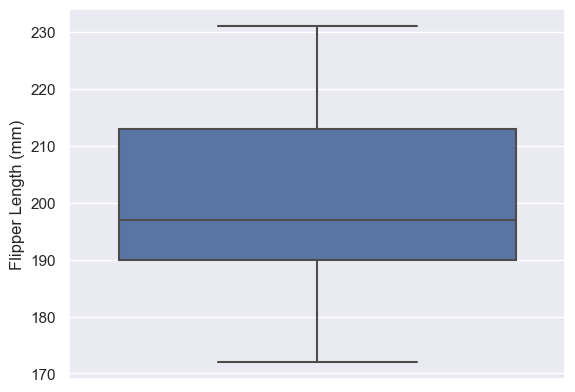

In [141]:
sns.boxplot(y = 'Flipper Length (mm)' , data = df)

In [142]:
df['Flipper Length (mm)'] = df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mean())

In [143]:
df['Body Mass (g)'].value_counts()

Body Mass (g)
3800    12
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: count, Length: 95, dtype: int64

In [144]:
df['Body Mass (g)'].replace({'.' : '3800'} , inplace = True)

In [145]:
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])

<AxesSubplot:ylabel='Body Mass (g)'>

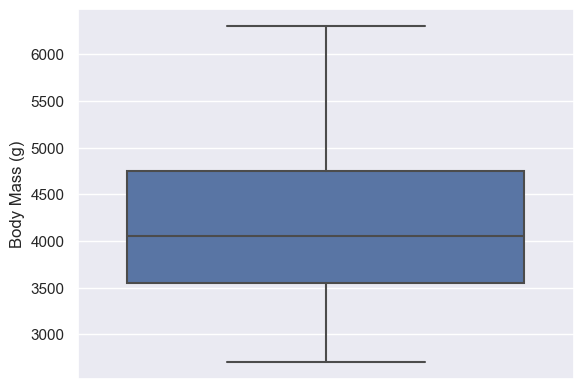

In [146]:
sns.boxplot(y = 'Body Mass (g)' , data = df)

In [147]:
df['Body Mass (g)'] = df['Body Mass (g)'].fillna(df['Body Mass (g)'].mean())

<AxesSubplot:ylabel='Culmen Length (mm)'>

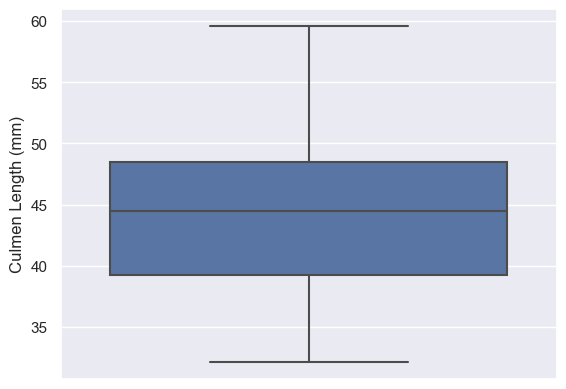

In [148]:
sns.boxplot(y = 'Culmen Length (mm)' , data = df)

In [149]:
df['Culmen Length (mm)'] = df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mean())

<AxesSubplot:ylabel='Culmen Depth (mm)'>

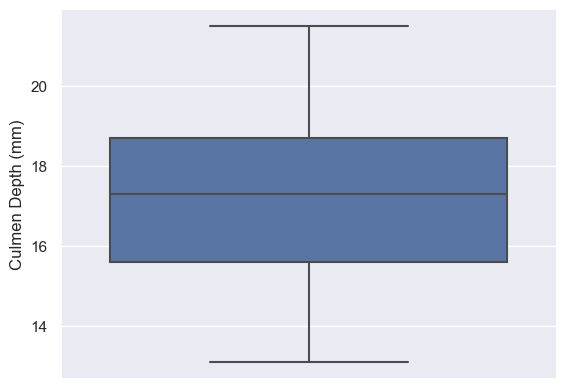

In [150]:
sns.boxplot(y = 'Culmen Depth (mm)' , data = df)

In [151]:
df['Culmen Depth (mm)'] = df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mean())

In [152]:
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])

In [153]:
df.isnull().sum() / len(df)*100

Species                0.0
Island                 0.0
Clutch Completion      0.0
Culmen Length (mm)     0.0
Culmen Depth (mm)      0.0
Flipper Length (mm)    0.0
Body Mass (g)          0.0
Sex                    0.0
dtype: float64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Clutch Completion    344 non-null    object 
 3   Culmen Length (mm)   344 non-null    float64
 4   Culmen Depth (mm)    344 non-null    float64
 5   Flipper Length (mm)  344 non-null    float64
 6   Body Mass (g)        344 non-null    float64
 7   Sex                  344 non-null    object 
dtypes: float64(4), object(4)
memory usage: 21.6+ KB


In [155]:
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes

In [156]:
df = pd.get_dummies(df ,columns = ['Island' , 'Clutch Completion' , 'Sex'] , drop_first = True , dtype = int)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                344 non-null    int8   
 1   Culmen Length (mm)     344 non-null    float64
 2   Culmen Depth (mm)      344 non-null    float64
 3   Flipper Length (mm)    344 non-null    float64
 4   Body Mass (g)          344 non-null    float64
 5   Island_Dream           344 non-null    int32  
 6   Island_Torgersen       344 non-null    int32  
 7   Clutch Completion_Yes  344 non-null    int32  
 8   Sex_FEMALE             344 non-null    int32  
 9   Sex_MALE               344 non-null    int32  
dtypes: float64(4), int32(5), int8(1)
memory usage: 17.9 KB


In [158]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,0,39.10000,18.70000,181.000000,3800.000000,0,1,1,0,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,1,1,0
2,0,40.30000,18.00000,190.000000,3250.000000,0,1,1,1,0
3,0,43.92193,17.15117,200.900585,4201.900585,0,1,1,0,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,1,1,0


# Featrue scaling is not required in decision Tree

<AxesSubplot:>

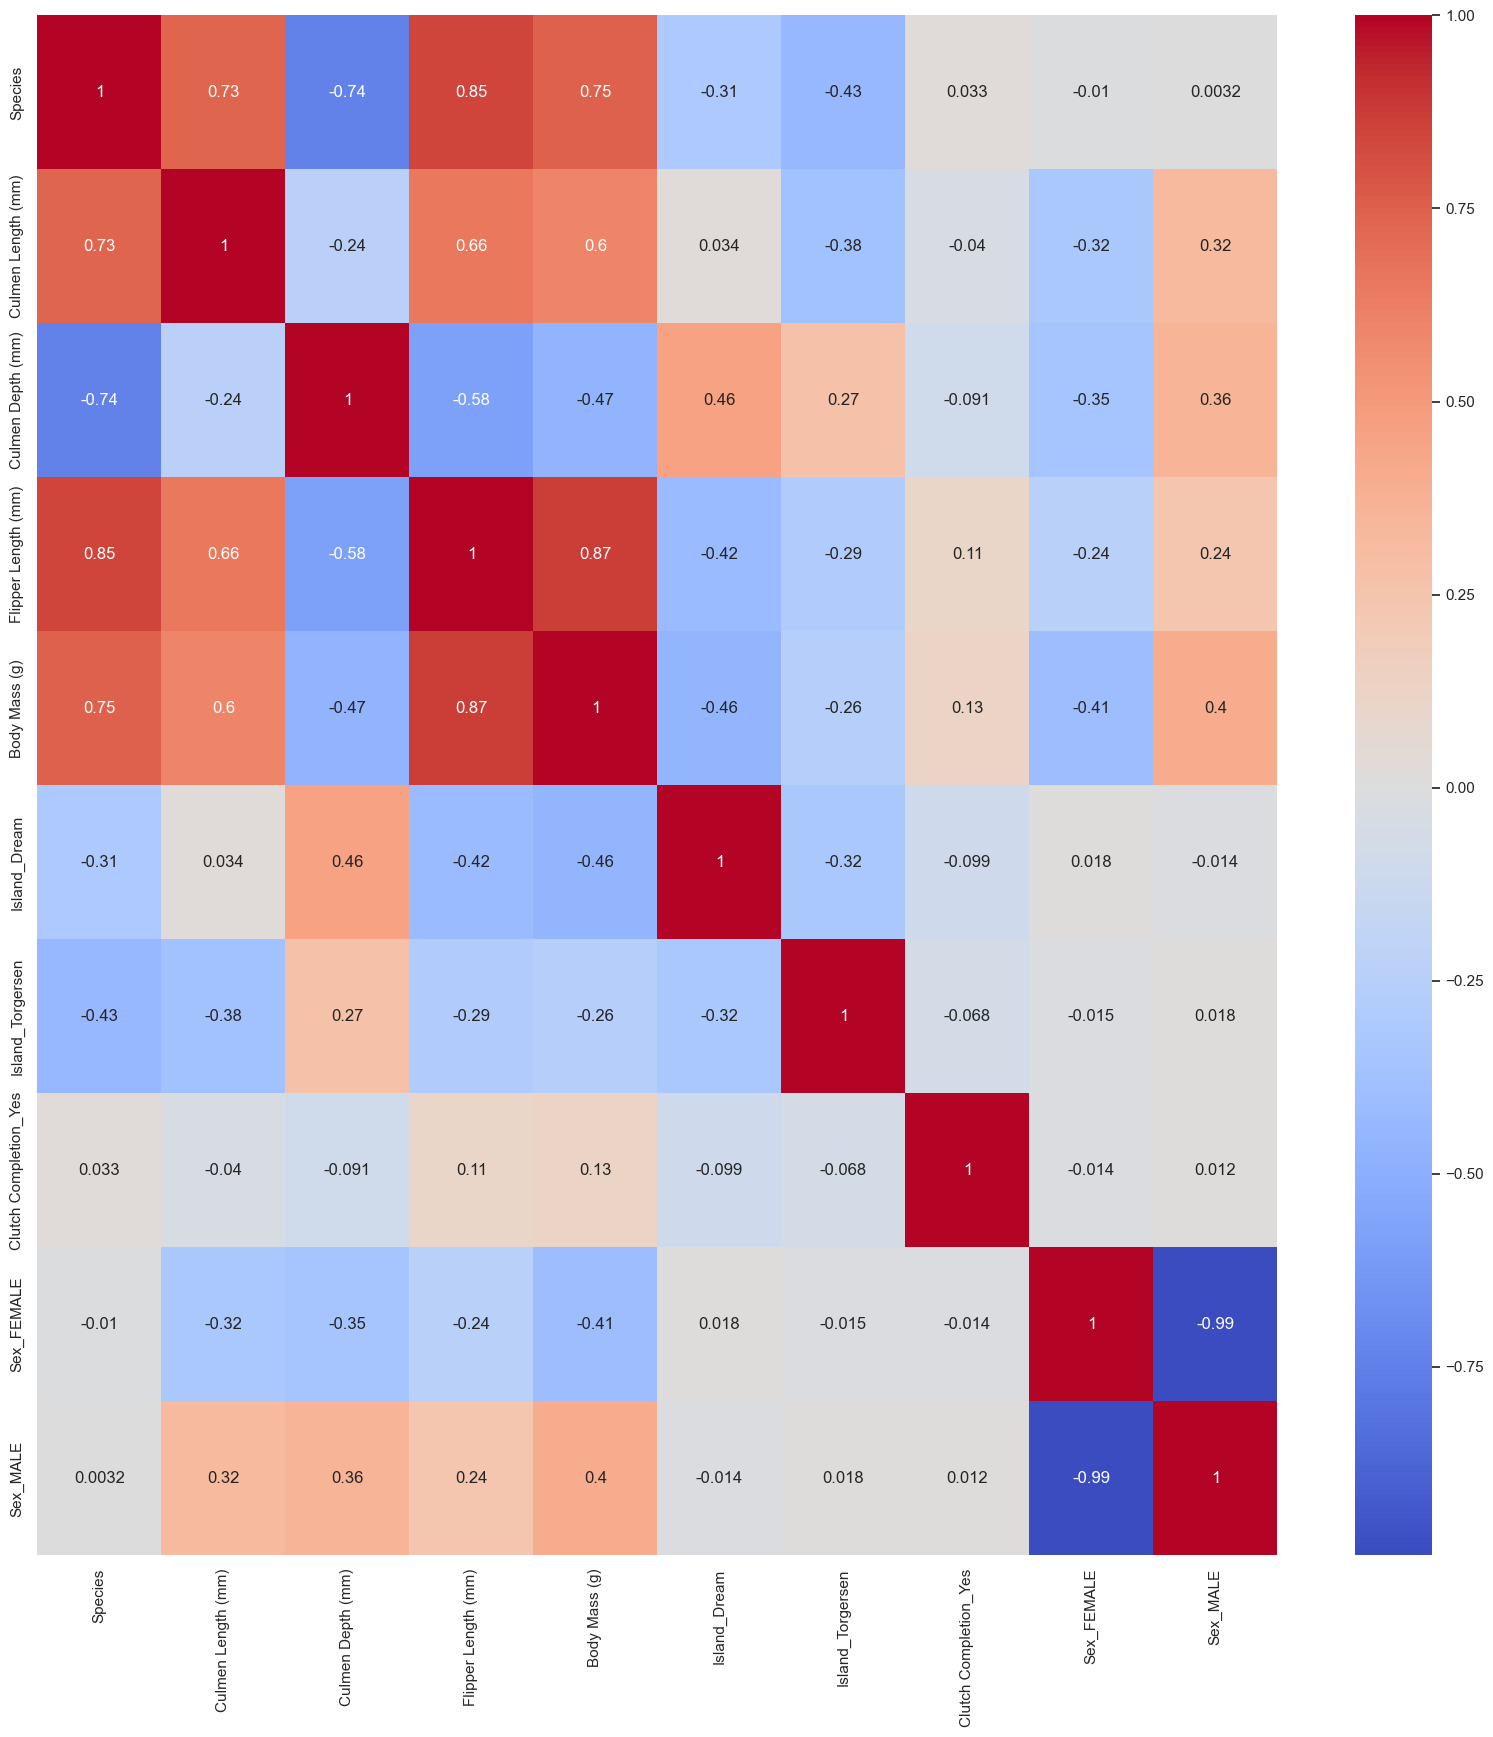

In [160]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr() , annot = True , cmap = 'coolwarm')
# here we dont go through multicolinearity concept and we are not considering it

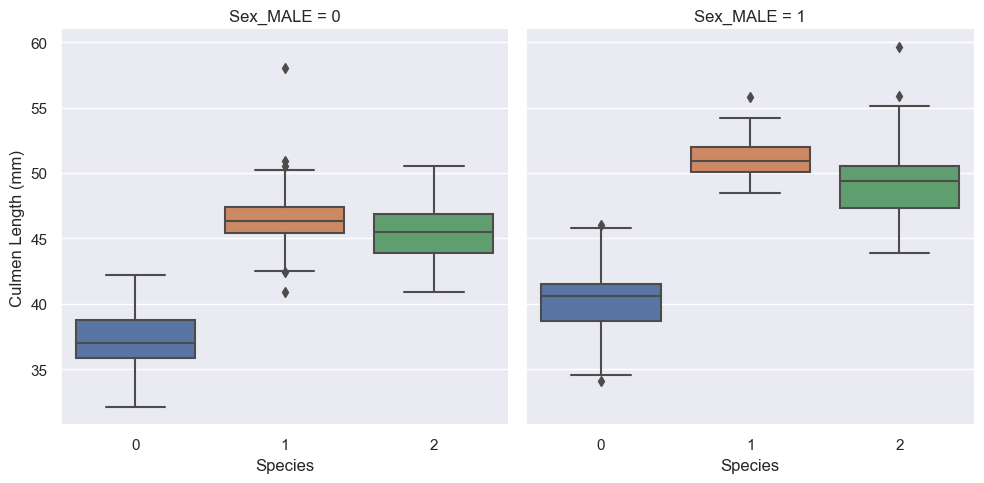

In [162]:
sns.catplot(data = df , x = 'Species' , y = 'Culmen Length (mm)' , kind = 'box' , col = 'Sex_MALE')

<Figure size 1500x1200 with 0 Axes>

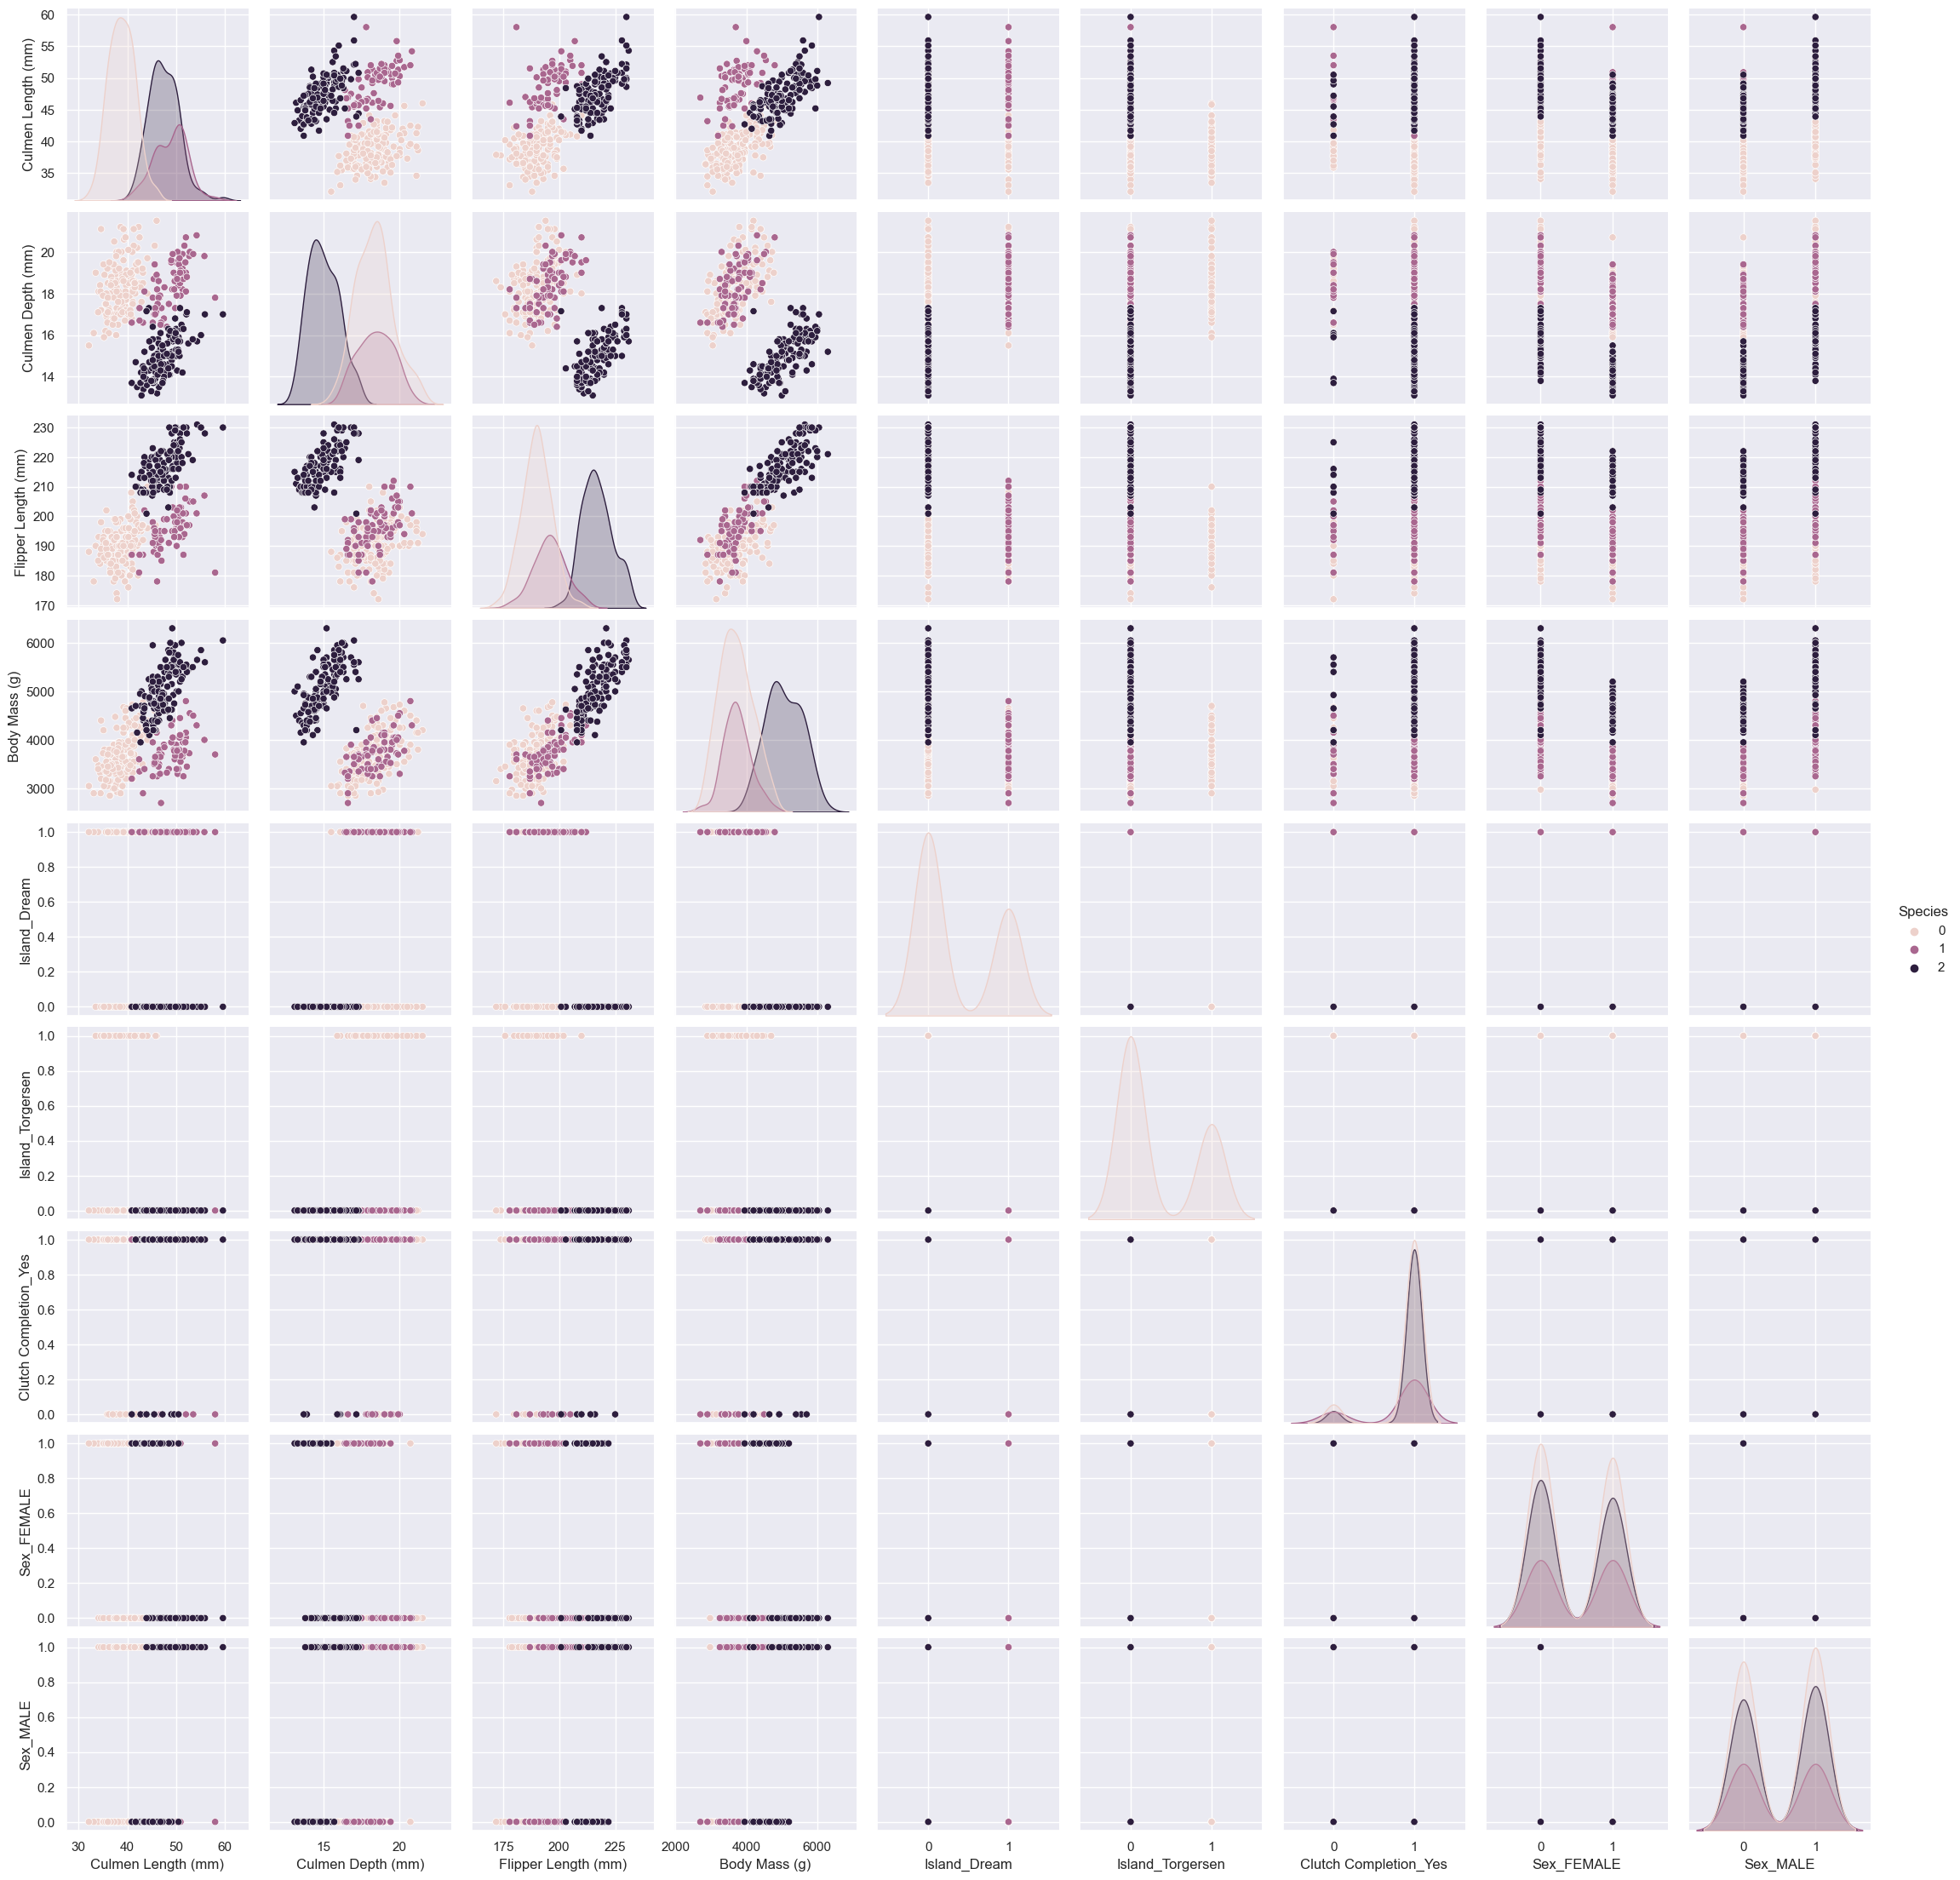

In [163]:
plt.figure(figsize = (15,12))
sns.pairplot(data = df , hue = 'Species')
plt.show()

In [164]:
df.head(2)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,0,39.1,18.7,181.0,3800.0,0,1,1,0,1
1,0,39.5,17.4,186.0,3800.0,0,1,1,1,0


In [169]:
#split the data into independent and dependent variable
x = df.iloc[: , 1:]
y = df[['Species']]

In [170]:
x

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,39.10000,18.70000,181.000000,3800.000000,0,1,1,0,1
1,39.50000,17.40000,186.000000,3800.000000,0,1,1,1,0
2,40.30000,18.00000,190.000000,3250.000000,0,1,1,1,0
3,43.92193,17.15117,200.900585,4201.900585,0,1,1,0,1
4,36.70000,19.30000,193.000000,3450.000000,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.900585,4201.900585,0,0,0,0,1
340,46.80000,14.30000,215.000000,4850.000000,0,0,1,1,0
341,50.40000,15.70000,222.000000,5750.000000,0,0,1,0,1
342,45.20000,14.80000,212.000000,5200.000000,0,0,1,1,0


In [171]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
339,2
340,2
341,2
342,2


In [174]:
#split data into train and test
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 20 , stratify = y)

# Building Decision Tree classifier Model

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dtree1 = DecisionTreeClassifier(criterion = 'gini')
dtree1.fit(x_train , y_train)
dtree2 = DecisionTreeClassifier(criterion = 'entropy')
dtree2.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [181]:
#predict
y_predict_train_1 = dtree1.predict(x_train)
y_predict_test_1 = dtree1.predict(x_test)

y_predict_train_2 = dtree2.predict(x_train)
y_predict_test_2 = dtree2.predict(x_test)

# accuracy score

In [184]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
print('gini')
print('training_accuracy =' , accuracy_score(y_train , y_predict_train_1))
print('test_accuracy =' , accuracy_score(y_test , y_predict_test_1))
print('entropy')
print('training_accuracy =' , accuracy_score(y_train , y_predict_train_2))
print('test_accuracy =' , accuracy_score(y_test , y_predict_test_2))

gini
training_accuracy = 1.0
test_accuracy = 0.9651162790697675
entropy
training_accuracy = 1.0
test_accuracy = 0.9651162790697675


# confusion matrix

In [189]:
print('gini')
print()
print('training_accuracy =\n' , confusion_matrix(y_train , y_predict_train_1))
print('test_accuracy =\n' , confusion_matrix(y_test , y_predict_test_1))
print()
print('entropy')
print()
print('training_accuracy =\n' , confusion_matrix(y_train , y_predict_train_2))
print('test_accuracy =\n' , confusion_matrix(y_test , y_predict_test_2))

gini

training_accuracy =
 [[114   0   0]
 [  0  51   0]
 [  0   0  93]]
test_accuracy =
 [[36  2  0]
 [ 0 17  0]
 [ 1  0 30]]

entropy

training_accuracy =
 [[114   0   0]
 [  0  51   0]
 [  0   0  93]]
test_accuracy =
 [[36  2  0]
 [ 0 17  0]
 [ 1  0 30]]


# Classification Report

In [190]:
print('gini')
print()
print('training_accuracy =\n' , classification_report(y_train , y_predict_train_1))
print('test_accuracy =\n' , classification_report(y_test , y_predict_test_1))
print()
print('entropy')
print()
print('training_accuracy =\n' , classification_report(y_train , y_predict_train_2))
print('test_accuracy =\n' , classification_report(y_test , y_predict_test_2))

gini

training_accuracy =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        93

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258

test_accuracy =
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.89      1.00      0.94        17
           2       1.00      0.97      0.98        31

    accuracy                           0.97        86
   macro avg       0.96      0.97      0.96        86
weighted avg       0.97      0.97      0.97        86


entropy

training_accuracy =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        51


# cross validation

In [192]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(dtree1 , x_train , y_train , cv = 10)
print(training_accuracy)
print()
print(training_accuracy.mean())
print()
print(training_accuracy.max())

[0.96153846 0.92307692 0.96153846 0.96153846 1.         1.
 0.92307692 1.         1.         1.        ]

0.973076923076923

1.0


# Final accuracy for training and test result

In [193]:
print('training mean accuracy' , training_accuracy.mean())
print(' gini test_accuracy =' , accuracy_score(y_test , y_predict_test_1))

training mean accuracy 0.973076923076923
 gini test_accuracy = 0.9651162790697675


# virtualize decision tree

In [195]:
# which variable is how much significant gini calculation just like we are finding root node
dtree1.feature_importances_

array([0.36819354, 0.05465954, 0.51704366, 0.01463207, 0.03632615,
       0.        , 0.        , 0.        , 0.00914504])

In [196]:
pd.DataFrame(index = x.columns , data = dtree1.feature_importances_ , columns = ['Feature Importance'])

,Feature Importance
Culmen Length (mm),0.368194
Culmen Depth (mm),0.054660
Flipper Length (mm),0.517044
Body Mass (g),0.014632
Island_Dream,0.036326
Island_Torgersen,0.000000
Clutch Completion_Yes,0.000000
Sex_FEMALE,0.000000
Sex_MALE,0.009145


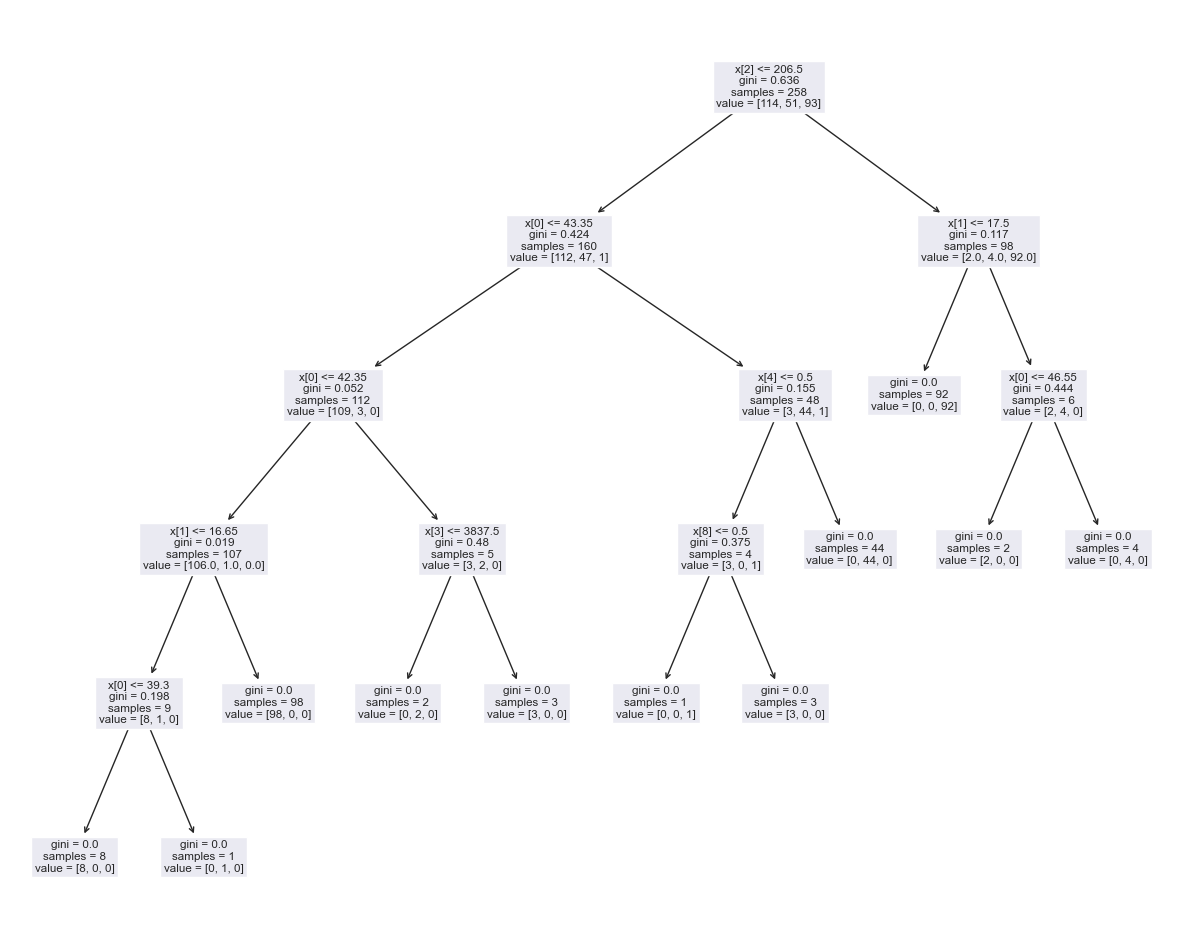

In [197]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,12))
plot_tree(dtree1)
plt.show()

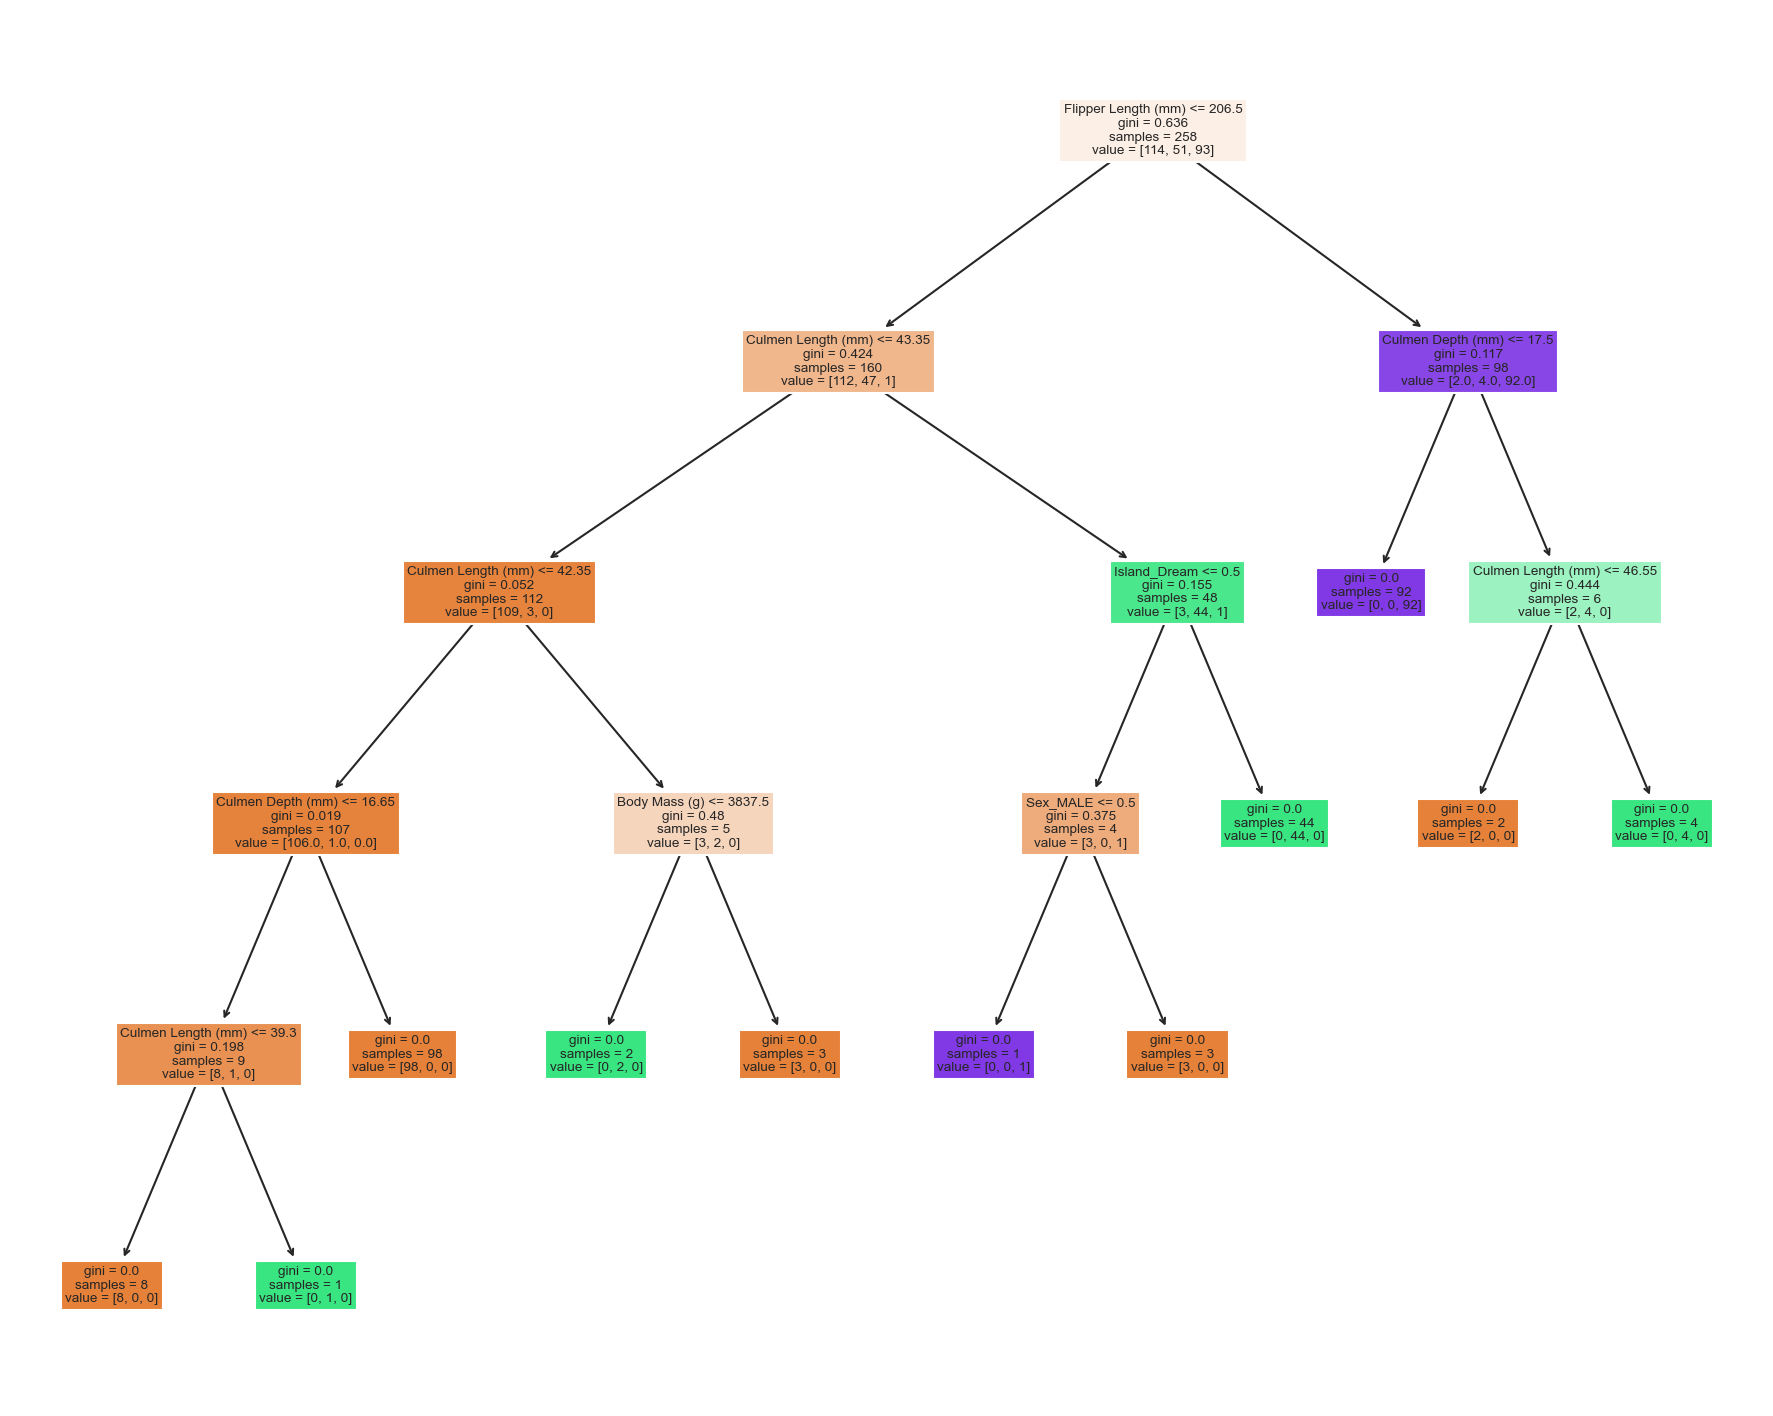

In [199]:
plt.figure(figsize = (15,12) , dpi = 150)
plot_tree(dtree1 , filled = True , feature_names = x.columns )
plt.show()

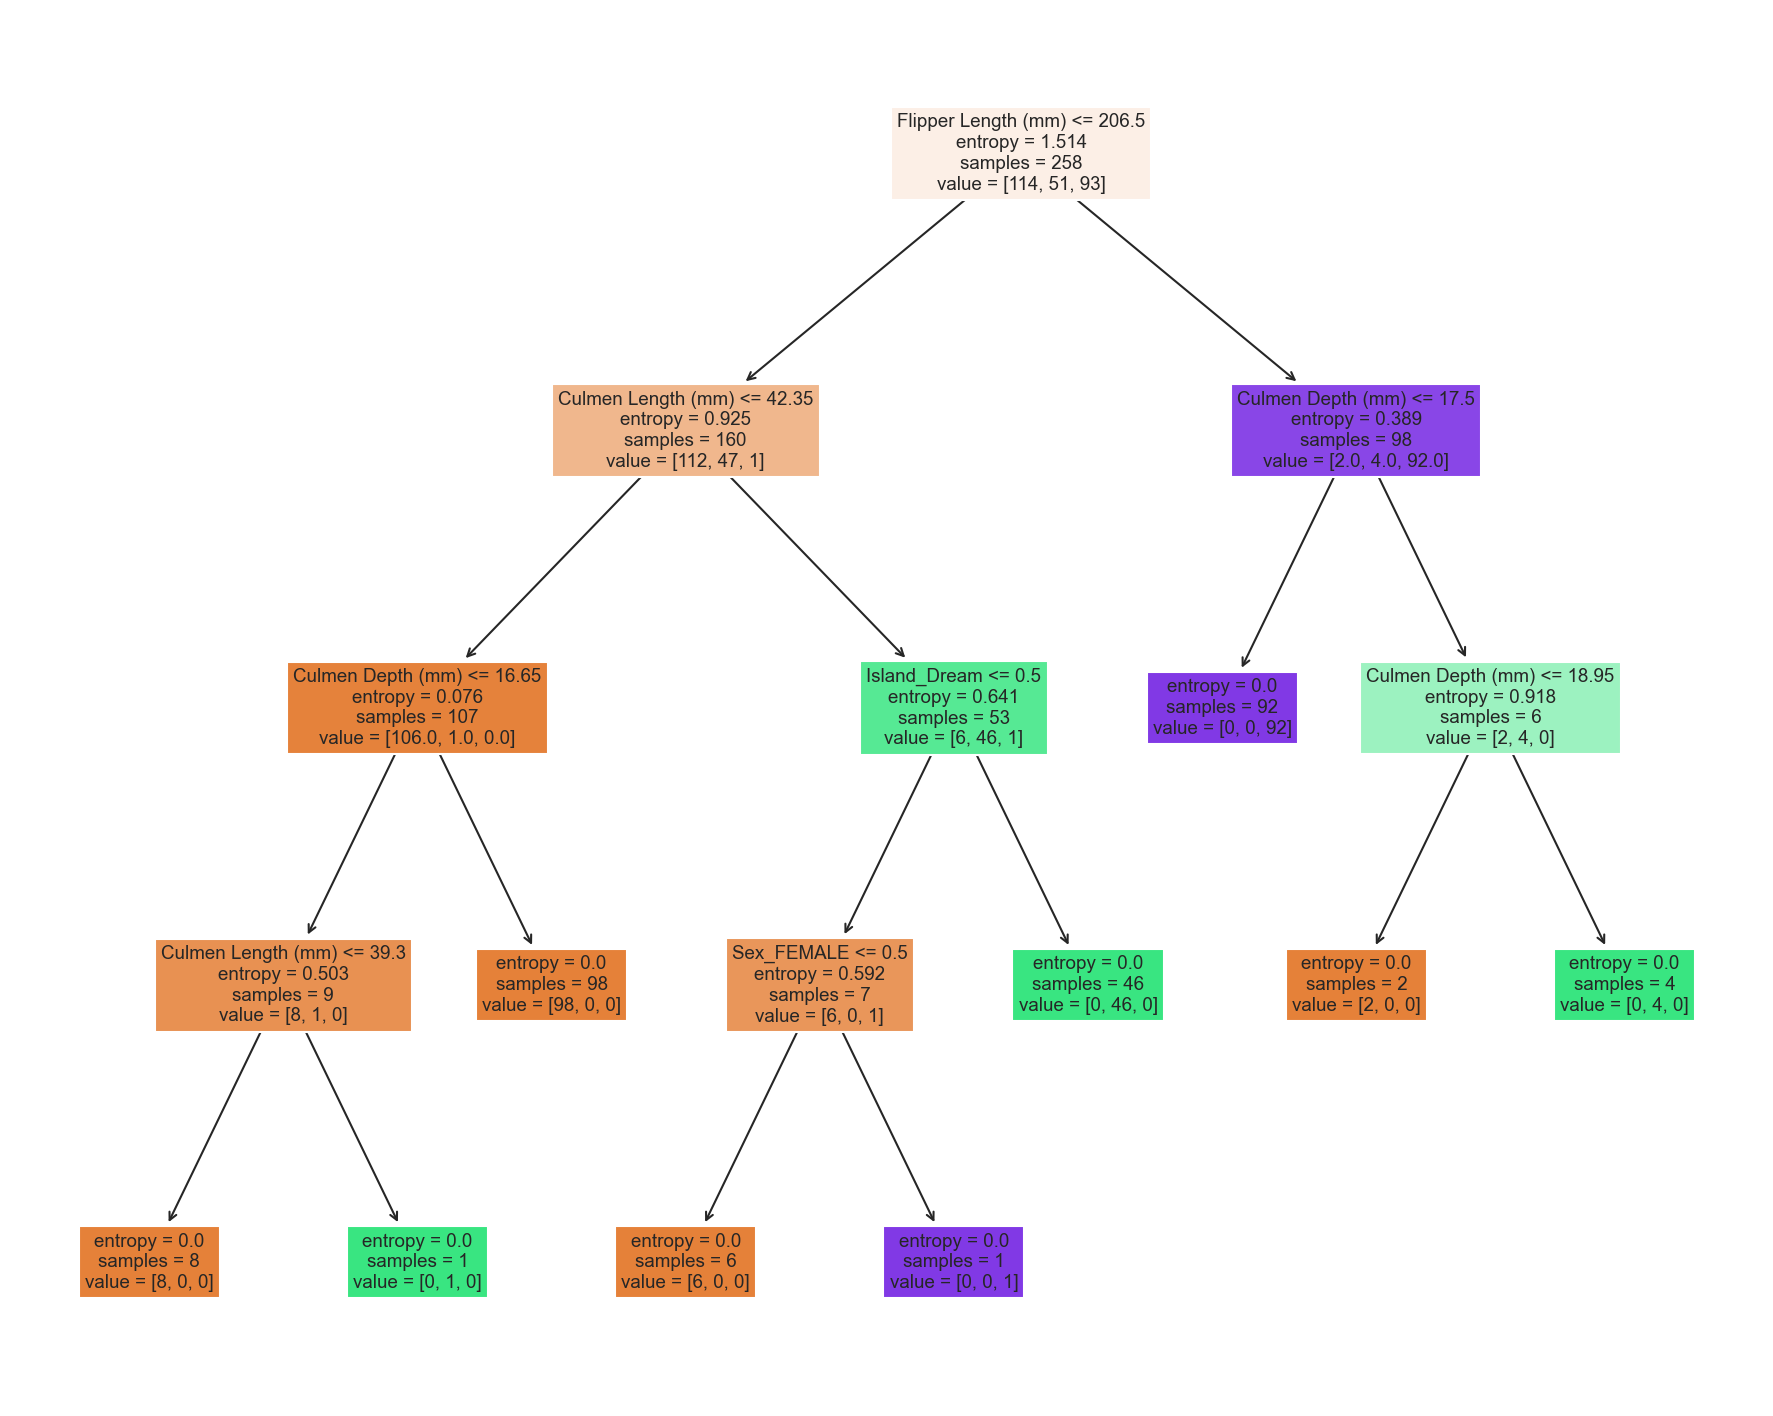

In [200]:
plt.figure(figsize = (15,12) , dpi = 150)
plot_tree(dtree2 , filled = True , feature_names = x.columns )
plt.show()

# overfitting - prunning (preprooning and post-prooning)

In [207]:
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test , model_preds))
    print(accuracy_score(y_test , model_preds))
    print('\n')
    plt.figure(figsize = (15,12) , dpi = 150)
    plot_tree(model , filled = True , feature_names = x.columns)

In [208]:
# HyperParameters tuning in DT
prunned_dt = DecisionTreeClassifier(max_depth = 3)
prunned_dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.94      0.88      0.91        17
           2       1.00      0.97      0.98        31

    accuracy                           0.95        86
   macro avg       0.95      0.94      0.95        86
weighted avg       0.95      0.95      0.95        86

0.9534883720930233




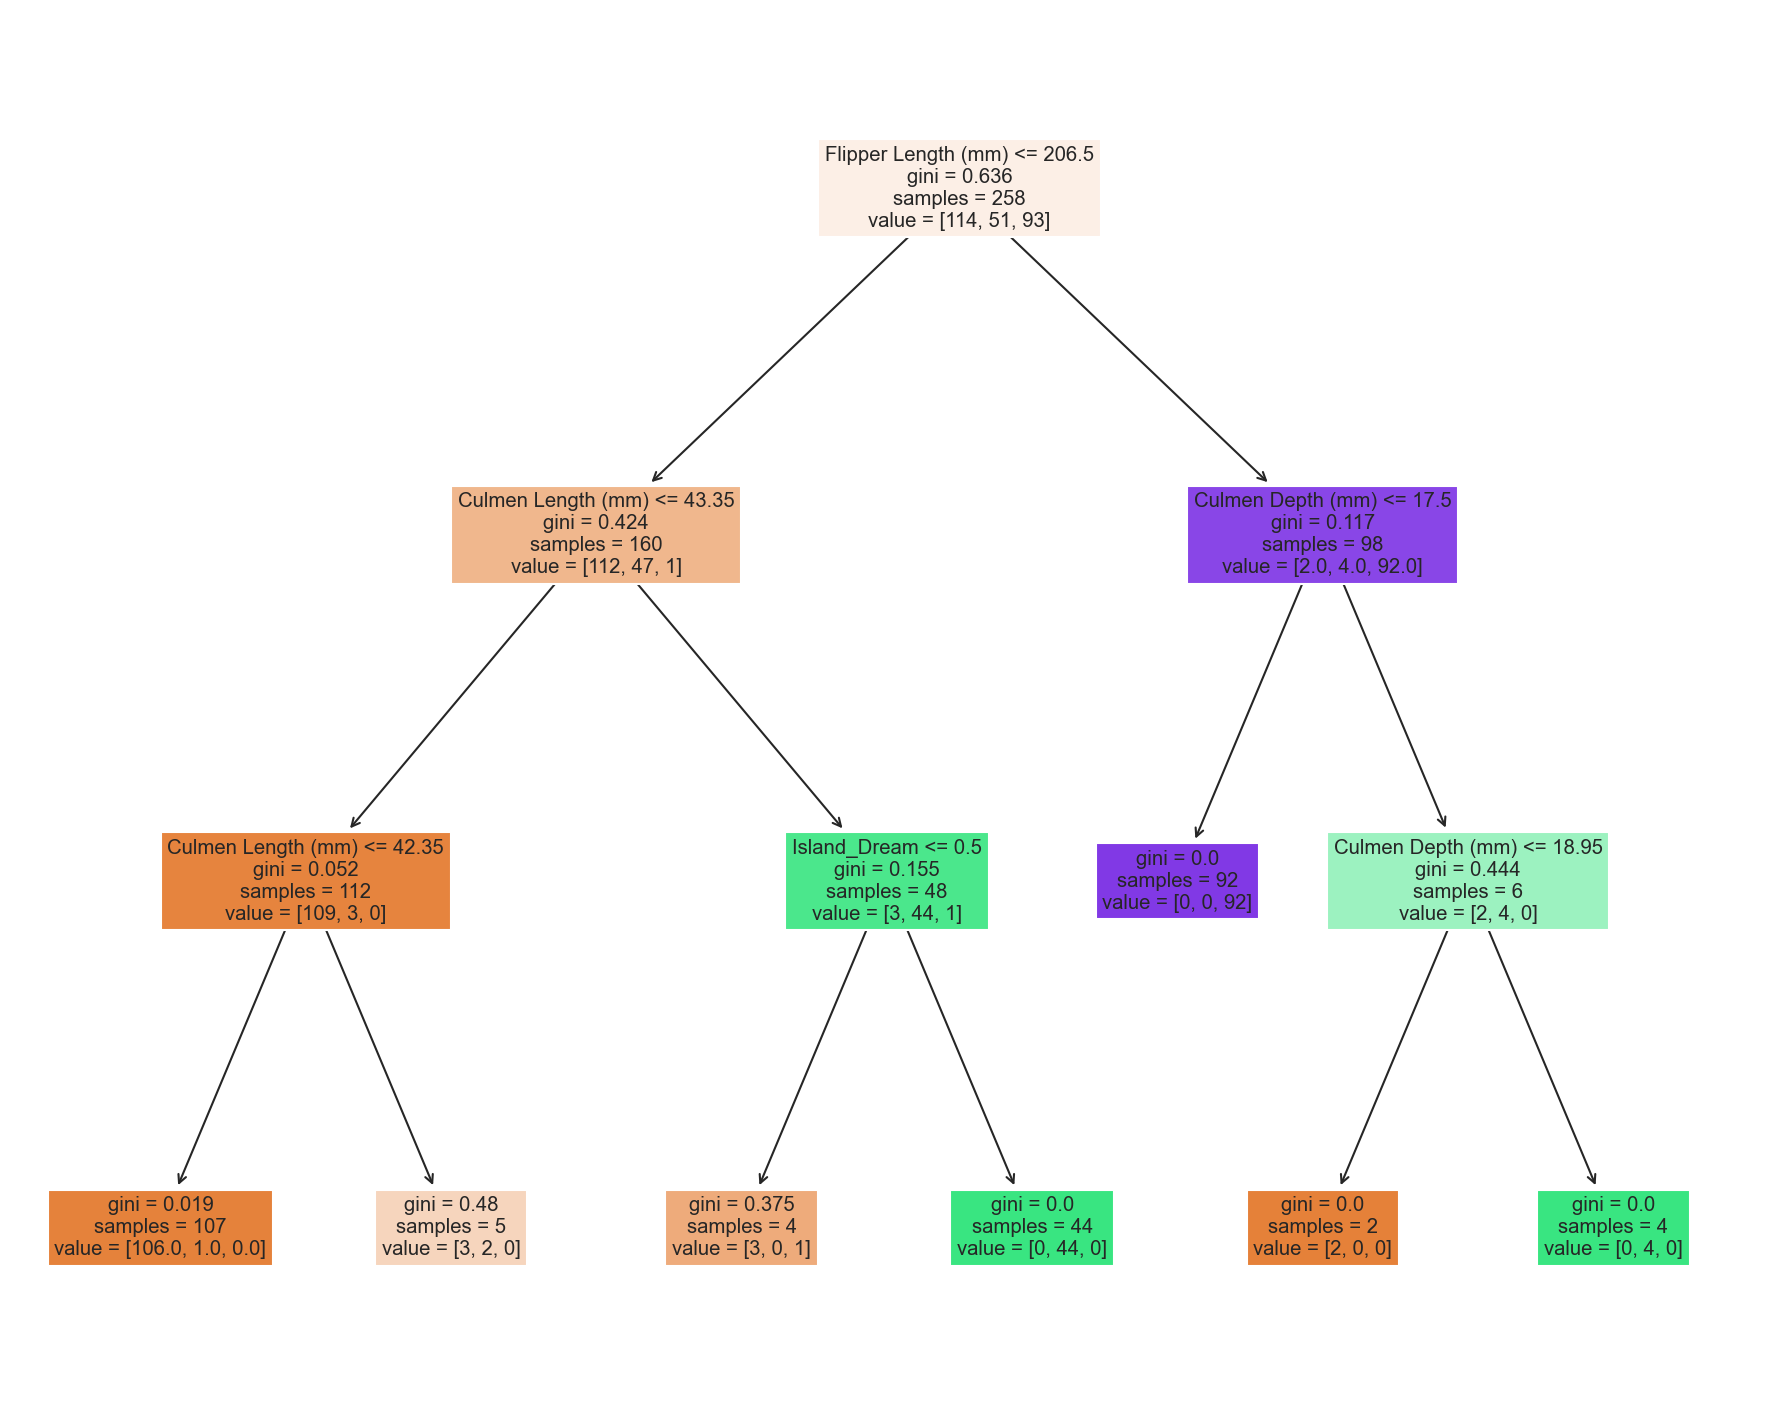

In [209]:
report_model(prunned_dt)

In [210]:
# HyperParameters tuning in DT 
prunned_dt1 = DecisionTreeClassifier(max_leaf_nodes =3)
prunned_dt1.fit(x_train , y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.82      0.82      0.82        17
           2       0.97      0.97      0.97        31

    accuracy                           0.93        86
   macro avg       0.91      0.91      0.91        86
weighted avg       0.93      0.93      0.93        86

0.9302325581395349




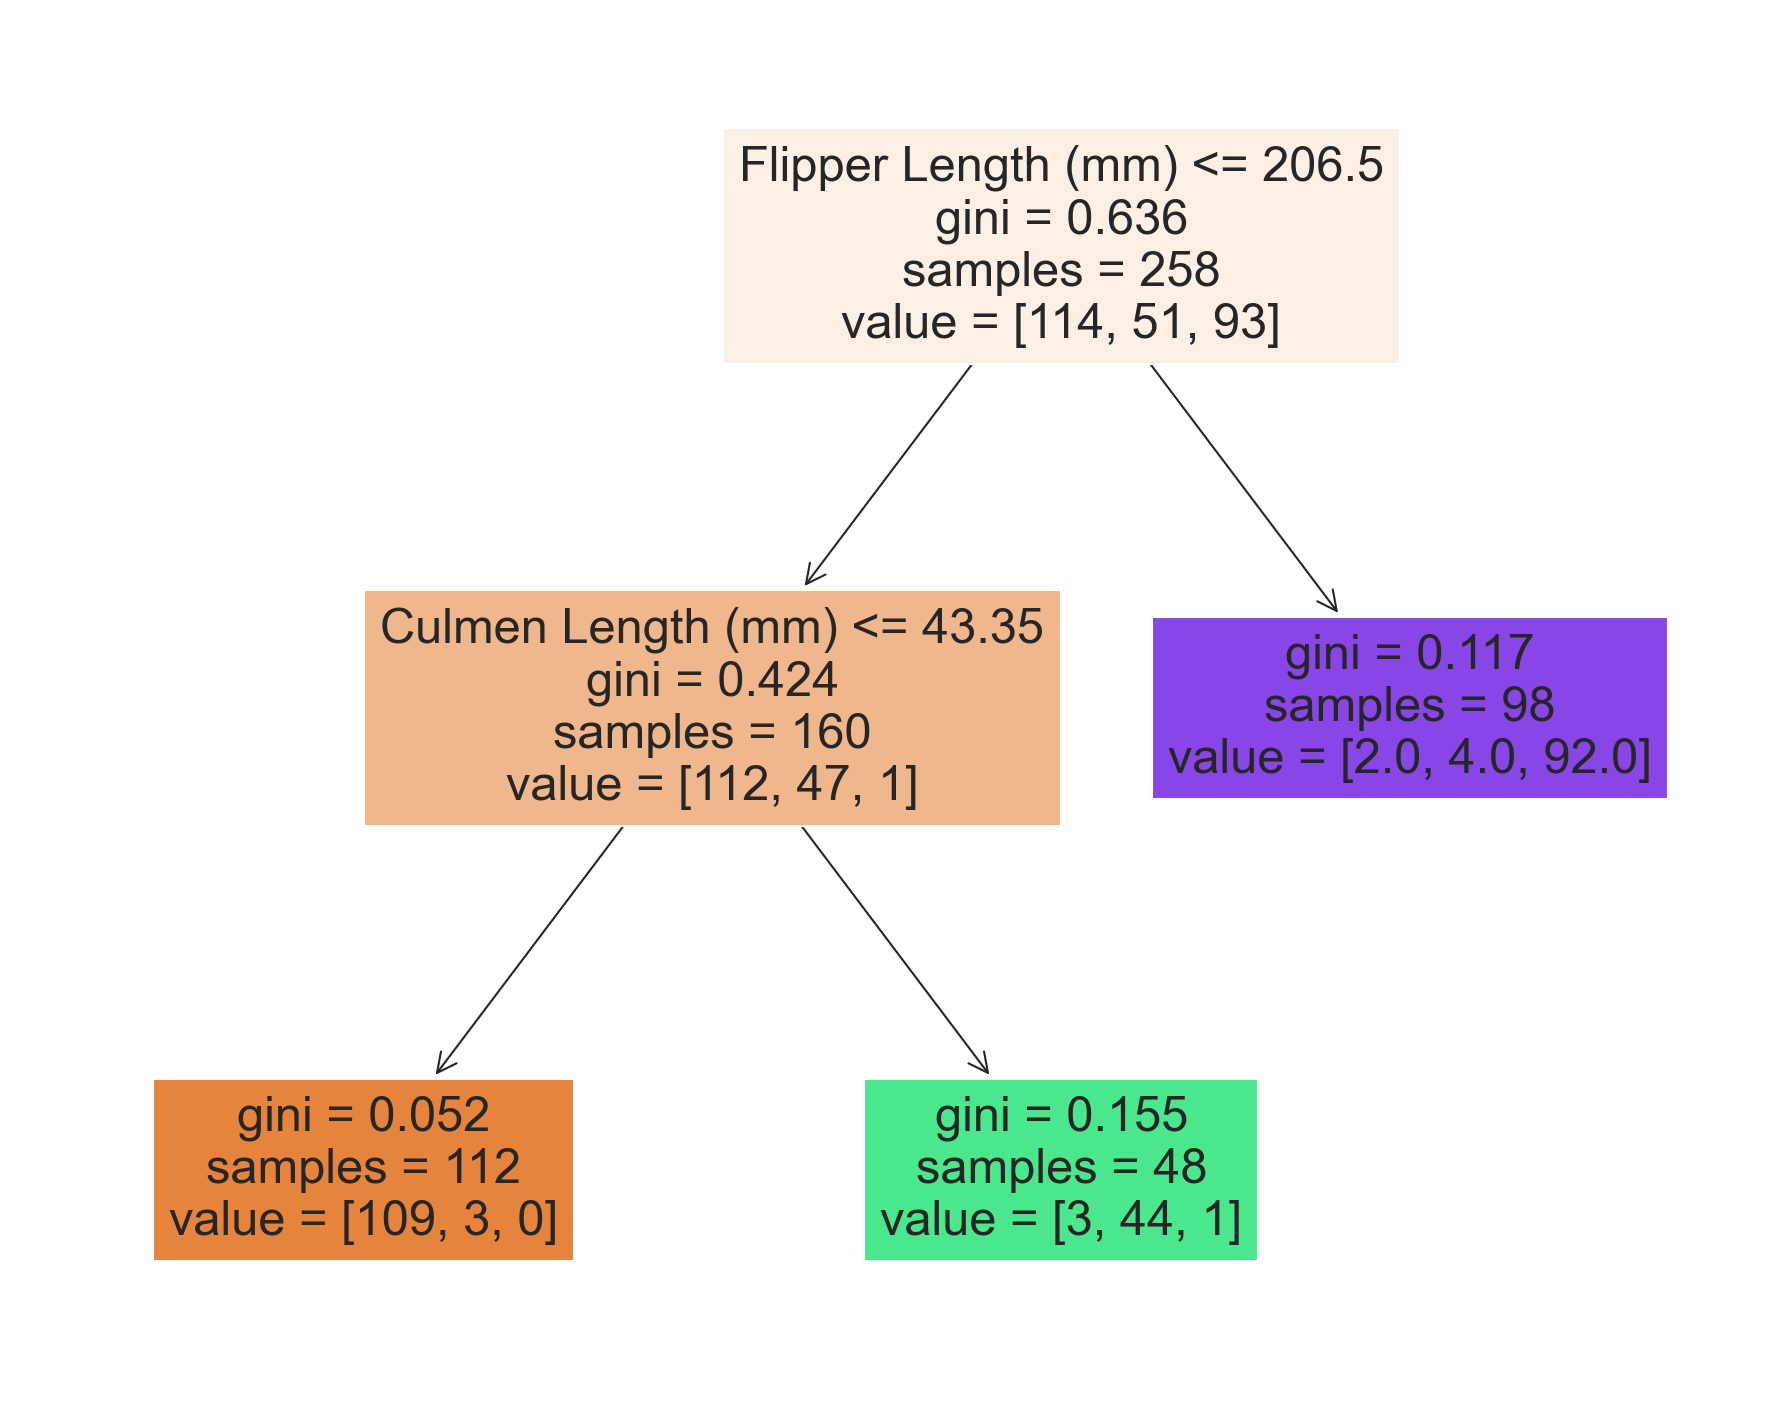

In [212]:
report_model(prunned_dt1)

# The End Decision Tree